# Entrega 3 - MLY0100

**Autor(es):** Javier Cerna, Luis Salamanca, y Vicente Solorza

**Correo Electr√≥nico:** ja.cernac@duocuc.cl, lui.salamanca@duocuc.cl,  vi.solorza@duocuc.cl

**Fecha de Creaci√≥n:** Junio 2025

**Versi√≥n:** 1.0  



---

## Descripci√≥n


Este notebook contiene el desarrollo de la evaluaci√≥n 3 de la asignatura optativa de Machine Learning de Duoc UC - Sede concepci√≥n

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuaci√≥n se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versi√≥n instalada ejecutar usando el siguiente comando, usando la librer√≠a de la cual quieres saber la versi√≥n:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!pip install kneed

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 17.9 MB 24.7 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 296.5/296.5 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 687.8/687.8 kB 31.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 105.4/105.4 kB 6.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=6240ec98c456b561c1c987ef1c1aed596fdc0efd4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

import plotly.express as px

from ydata_profiling import ProfileReport

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fase 1 - Compresi√≥n del negocio

## üéØ Objetivo General

El prop√≥sito de este proyecto es **segmentar a los clientes** del Banco Monopoly, recientemete adqurido por Dormammu, con base en sus caracter√≠sticas y comportamiento crediticio con objeto de generar **agrupaciones homog√©neas** que faciliten la toma de decisiones estrat√©gicas en √°reas como marketing, riesgo y fidelizaci√≥n.

## üìå Objetivos Espec√≠ficos

- **Modelo 1**: Detectar grupos de clientes en funci√≥n de su **capacidad econ√≥mica y relaci√≥n con la instituci√≥n**, usando √∫nicamente dos variables que capturen estas dimensiones.
- **Modelo 2**: Incorporar **variables de comportamiento transaccional** para generar una segmentaci√≥n m√°s rica y detallada.

---

## üß† Consideraciones del Negocio

- El banco Dormammu necesita herramientas que permitan entender **c√≥mo se diferencian los clientes entre s√≠** m√°s all√° de los productos contratados.
- Estas segmentaciones deben ser **accionables y comprensibles** para los equipos no t√©cnicos.
- El enfoque es **no supervisado**, ya que no se cuenta con una clasificaci√≥n previa de clientes o una variable target.

---

## üßÆ Definici√≥n de Modelos y Variables

### üîπ Modelo 1 ‚Äì Segmentaci√≥n Socioecon√≥mica B√°sica

**Variables seleccionadas**:
- `Renta`: Ingreso mensual declarado del cliente.
- `Antig√ºedad`: Tiempo (en a√±os) desde que el cliente ingres√≥ a la instituci√≥n.

**Justificaci√≥n**:
- Ambas variables permiten identificar clientes con **alta capacidad econ√≥mica** y **relaciones de largo plazo** con la entidad. Esto es clave para estrategias de retenci√≥n, beneficios o riesgos crediticios.
- Son variables estables, por tanto, no dependen del comportamiento reciente.

---

### üîπ Modelo 2 ‚Äì Segmentaci√≥n Comportamental Extendida

**Variables seleccionadas**:
- `Renta`: Indicador de capacidad econ√≥mica.
- `Antig√ºedad`: Indicador de fidelidad/relaci√≥n institucional.
- `Cupo_L1`: L√≠mite de cr√©dito autorizado para el cliente en la l√≠nea 1.
- `Txs_T12`: N√∫mero de transacciones realizadas por el cliente en el mes 12.

**Justificaci√≥n**:
- Se busca integrar tanto el **perfil financiero** (capacidad y relaci√≥n) como el **comportamiento de uso reciente del producto**.
- `Txs_T12` refleja **nivel de actividad reciente**, mientras que `Cupo_L1` puede actuar como proxy de confianza otorgada por la instituci√≥n.

---

## ‚úÖ Resultados esperados

- Obtenci√≥n de grupos de clientes **internamente similares y externamente distintos**.
- Posibilidad de aplicar las segmentaciones en procesos de:
  - Definici√≥n de productos personalizados.
  - Campa√±as de marketing segmentadas.
  - Evaluaci√≥n de riesgo crediticio.
  - An√°lisis de fidelizaci√≥n.

> Esta fase sienta las bases conceptuales para las decisiones posteriores del proyecto, asegurando alineamiento entre los objetivos t√©cnicos y las metas del negocio.


# Fase 2 - Entendimiento de los datos

## üéØ Objetivo de la Fase

El prop√≥sito de esta fase es **entender la estructura, calidad y comportamiento estad√≠stico de las variables seleccionadas** para los modelos de clustering definidos previamente. Esto permitir√° detectar posibles problemas de calidad de datos, outliers, distribuciones sesgadas o patrones relevantes.

---

## üîç Variables Seleccionadas para Exploraci√≥n

La exploraci√≥n descriptiva se centrar√° en las variables que componen los dos modelos definidos:

### üîπ Modelo 1 ‚Äì Clustering socioecon√≥mico b√°sico
- `Renta`
- `Antig√ºedad`

### üîπ Modelo 2 ‚Äì Clustering con comportamiento
- `Renta`
- `Antig√ºedad`
- `Cupo_L1`
- `Txs_T12`

---

## üß™ T√©cnica de Exploraci√≥n

Se utilizar√° la librer√≠a `pandas_profiling` (ahora conocida como `ydata-profiling`) para generar un **informe autom√°tico (`ProfileReport`)**, el cual proporciona:

- Estad√≠sticos descriptivos (media, mediana, desviaci√≥n est√°ndar, etc.)
- Identificaci√≥n de valores nulos y tipos de datos
- Detecci√≥n de outliers potenciales
- Distribuciones y diagramas de densidad
- Matrices de correlaci√≥n entre variables

---

## ‚úÖ Resultados esperados

- Confirmar la calidad y tipo de datos de las variables seleccionadas
- Detectar la necesidad de:
  - Imputaciones
  - Transformaciones (escalado, normalizaci√≥n)
  - Tratamiento de valores extremos
- Validar que las variables son aptas para su uso en algoritmos de clustering como K-means

> Los hallazgos de esta fase fundamentar√°n la posterior **preparaci√≥n de los datos** y permitir√°n realizar los primeros juicios sobre la estructura latente en los datos.

## Carga de los Datos

In [ ]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-06-24 23:46:20--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-06-24 23:46:20--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4946fd8bcd3b321a8c16a23155.dl.dropboxusercontent.com/cd/0/inline/CsSiDt_W06Tb2RR7fRmcOvnrjvO5BUYDiyA5r-P_HFFnsSIcE6VhbXVcw41Qcrd_8MCTxWQk8-Bu3Pd-jXW6TSS6_fQR9NO_vJrAgo9JbQsmXWVfl-l6nAlyRDef2mwFfNdKZ_ZTjbcOAalpoeH6oly7/file# [following]
--2025-06-24 23:46:20--  https://uc4946fd8bcd3b321a8c16a231

In [ ]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data

Id  Subsegmento Sexo  Region  Edad   Renta  Antiguedad  Internauta  \
0          1          160    M    13.0    43     NaN         130           1   
1          2          160    H    13.0    46  143640          69           1   
2          3          170    H    13.0    45  929106          24           1   
3          4          151    H    13.0    46  172447         134           0   
4          5          170    H    13.0    46  805250         116           0   
...      ...          ...  ...     ...   ...     ...         ...         ...   
51119  51120          160    H    13.0    51  364978          57           1   
51120  51121          170    H    13.0    51  625376          39           1   
51121  51122          160    H    13.0    47  806220         153           1   
51122  51123          160    M    13.0    47     NaN          11           1   
51123  51124          170    H    13.0    51  840878          75           1   

       Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  \
0              1         0  ...          0        33000            0   
1              0         0  ...          0       300000            0   
2              1         0  ...          0       216676            0   
3              1         0  ...          0        60000            0   
4              1         1  ...          0       272925            0   
...          ...       ...  ...        ...          ...          ...   
51119          1         1  ...          0       300000            0   
51120          0         0  ...          0       166098            0   
51121          1         0  ...          0        18891            0   
51122          0         0  ...          0        26528            0   
51123          1         0  ...          0        12360            0   

       EeccNac_T01  EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  \
0          1099866            0    1099866      15080          0           R   
1           214592            0     214592      83596          0           R   
2                0            0       7400          0          0           T   
3           272762            0     272762      10591          0           R   
4           249562            0      75339     377782          0           R   
...            ...          ...        ...        ...        ...         ...   
51119       478320            0     478320      12668          0           R   
51120       166098            0          0     572363          0           R   
51121         9652            0       9652      16241          0           R   
51122        24638            0      24638      84982          0           R   
51123        12360            0      18500          0          0           R   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
51119      0  
51120      0  
51121      0  
51122      0  
51123      0  

[51124 rows x 574 columns]

In [ ]:
perfil_renta = ProfileReport(data[['Renta']], title="Perfil de Renta", minimal=True)

perfil_renta.to_notebook_iframe()

perfil_antiguedad = ProfileReport(data[['Antiguedad']], title="Perfil de Antig√ºedad", minimal=True)

perfil_antiguedad.to_notebook_iframe()

perfil_txs_12 = ProfileReport(data[['Txs_T12']], title="Perfil de Transacciones Diciembre", minimal=True)

perfil_txs_12.to_notebook_iframe()

perfil_cupo_l1 = ProfileReport(data[['CUPO_L1']], title="Perfil del Cupo del Cliente", minimal=True)

perfil_cupo_l1.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  2.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 21.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 12.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 23.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# üîé An√°lisis Estad√≠stico de Variables Seleccionadas

Como parte de la **fase de comprensi√≥n de los datos** se analizan los principales estad√≠sticos de las variables que componen el **Modelo 2** de clustering (Renta, Antig√ºedad, Cupo_L1 y Txs_T12).

---

## üü° `Txs_T12` ‚Äì N√∫mero de Transacciones en el mes 12

- **Mediana**: 1
- **Media**: 2.59
- **M√°ximo**: 56
- **M√≠nimo**: -2
- **Desviaci√≥n est√°ndar**: 3.75
- **Asimetr√≠a (Skewness)**: 2.96
- **Curtosis**: 13.94
- **Coeficiente de variaci√≥n (CV)**: 1.45

### üîç Observaciones

- La **mediana baja (1)** y el **Q1 = 0** sugieren que una gran proporci√≥n de clientes realiz√≥ pocas o ninguna transacci√≥n.
- Se detectan **valores negativos**, lo que no tiene sentido en una variable de conteo: deben ser tratados (imputados o reemplazados).
- La **alta asimetr√≠a** y **curtosis** indican que la mayor√≠a de los valores son bajos y existen outliers con actividad muy alta.
- Por su distribuci√≥n, esta variable **contribuye a identificar diferencias de comportamiento entre usuarios activos e inactivos.**

---

## üü† `Cupo_L1` ‚Äì L√≠mite de cr√©dito autorizado

- **Mediana**: 800,000
- **Media**: 1,133,186
- **M√°ximo**: 21,534,000
- **M√≠nimo**: 0
- **IQR**: 1,127,000
- **Desviaci√≥n est√°ndar**: 1,076,922
- **Asimetr√≠a**: 2.66
- **Curtosis**: 16.25

### üîç Observaciones

- El **rango de valores es muy amplio** con un m√°ximo m√°s de 26 veces mayor que la mediana: fuerte dispersi√≥n y presencia de valores extremos.
- La distribuci√≥n est√° **altamente sesgada a la derecha**. Esto puede afectar modelos sensibles a escala como K-means.
- Esta variable puede reflejar la **confianza que la instituci√≥n tiene en el cliente**, por lo que es √∫til para enriquecer los clusters.

---

## üîµ `Antig√ºedad` ‚Äì Tiempo desde ingreso a la instituci√≥n (en meses)

- **Mediana**: 25
- **Media**: 38.89
- **M√°ximo**: 324
- **M√≠nimo**: 6
- **IQR**: 40
- **Desviaci√≥n est√°ndar**: 35.67
- **Asimetr√≠a**: 1.78
- **Curtosis**: 3.55

### üîç Observaciones

- La mayor√≠a de los clientes tiene **antig√ºedad baja o media** con pocos casos muy antiguos.
- La **asimetr√≠a positiva** sugiere que hay un grupo reducido de clientes con muchos a√±os de relaci√≥n.
- Puede aportar informaci√≥n sobre la **lealtad y madurez de la relaci√≥n financiera**.

---

## üî¥ `Renta` ‚Äì Ingreso mensual declarado

> Se detect√≥ que esta variable est√° almacenada como **string**, por lo que ser√° necesario **convertirla a formato num√©rico** antes de cualquier an√°lisis estad√≠stico o modelado.

---

## ‚úÖ Pasos a seguir

- Imputar valores negativos y nulos en `Txs_T12` usando la **mediana**, dado su sesgo.
- Aplicar **escalado est√°ndar o normalizaci√≥n** para todas las variables, ya que difieren significativamente en rango y dispersi√≥n.
- Considerar transformaciones logar√≠tmicas si se desea mitigar el efecto de los valores extremos.

> Estas observaciones forman la base para la **fase de preparaci√≥n**, donde se limpiar√°n, transformar√°n y escalar√°n las variables antes de aplicarlas a modelos de clustering.


# Fase 3 - Preparaci√≥n de datos

En esta etapa se realizan las transformaciones necesarias para asegurar la calidad y adecuaci√≥n de los datos antes de aplicar modelos de clustering. A continuaci√≥n, se describen los pasos realizados sobre las variables seleccionadas:

---

### üîπ Renta

- La variable `Renta` se encuentra originalmente en formato string, por lo cual se elimina cualquier car√°cter no num√©rico y se convierte al tipo num√©rico.
- Una vez convertida, se imputan los valores nulos utilizando la mediana, dado que esta medida es menos sensible a valores extremos o outliers que la media.

---

### üîπ Antig√ºedad

- Esta variable ya se encuentra en formato num√©rico y no contiene valores nulos, por lo que no requiere imputaci√≥n.
- Se incluye directamente en el proceso de escalado para normalizar su escala respecto a las dem√°s variables.

---

### üîπ Escalado de Renta y Antig√ºedad

- Se aplicar√° un escalado est√°ndar para llevar ambas variables a una escala com√∫n con media cero y desviaci√≥n est√°ndar uno. Esta transformaci√≥n es fundamental para evitar que diferencias de magnitud distorsionen el an√°lisis de clustering.

---

### üîπ Txs_T12

- Esta variable representa el n√∫mero de transacciones realizadas durante el mes 12. Contiene valores negativos y nulos que no son coherentes con una variable de conteo. Por tanto, se reemplazan dichos valores por la mediana calculada a partir de los valores v√°lidos (es decir, mayores o iguales a cero). Luego de la imputaci√≥n, se procede tambi√©n a su escalado estandarizado.

---

### üîπ CUPO_L1

- Se considera esta variable como un indicador de la l√≠nea de cr√©dito disponible del cliente.
- No contiene nulos, pero debido a su alta dispersi√≥n, se incluye en el mismo proceso de escalado est√°ndar que el resto de las variables.

---

### üîπ Consolidaci√≥n final

- Todas las variables escaladas (`Renta`, `Antig√ºedad`, `CUPO_L1` y `Txs_T12`) se combinan en un √∫nico conjunto de datos procesado, que servir√° como base para aplicar el modelo K-means con 2 y 4 caracter√≠sticas.

---

> ‚úÖ Con estas transformaciones se garantiza que todas las variables est√©n limpias, consistentes, sin valores inv√°lidos y en una escala comparable, condiciones necesarias para obtener agrupaciones fiables y significativas.


In [ ]:
#Copia del Dataset origianl
data_clean = data.copy()

#Limpieza y transformaci√≥n de la variable Renta a tipo num√©rico
data_clean['Renta'] = data_clean['Renta'].replace(r'[^\d.]', '', regex=True)
data_clean['Renta'] = pd.to_numeric(data_clean['Renta'], errors='coerce')
data_clean['Renta'] = data_clean['Renta'].fillna(data_clean['Renta'].median())

#Escalado de las variables renta y antiguedad
scaler = StandardScaler()
scaled = scaler.fit_transform(data_clean[['Renta', 'Antiguedad']])
scaled_df = pd.DataFrame(scaled, columns=['Renta_scaled', 'Antiguedad_scaled'], index=data_clean.index)

In [ ]:
#Limpieza y transformaci√≥n de la variable Transacciones realizadas en Diciembre a tipo num√©rico
data_clean['Txs_T12'] = pd.to_numeric(data['Txs_T12'], errors='coerce')  # Asegurar tipo num√©rico
data_clean['Txs_T12'] = data['Txs_T12'].apply(lambda x: 1 if pd.isna(x) or x < 0 else x)


In [ ]:
# Imputaci√≥n de Txs_T12: reemplazar nulos o negativos por la mediana v√°lida
mediana_txs = data_clean.loc[data_clean['Txs_T12'] >= 0, 'Txs_T12'].median()
data_clean['Txs_T12'] = data_clean['Txs_T12'].apply(lambda x: mediana_txs if pd.isna(x) or x < 0 else x)

# Escalado de Txs_12 y CUPO_L1
scaled_values = scaler.fit_transform(data_clean[['CUPO_L1', 'Txs_T12']])

# Guardar en nuevo DataFrame
scaled_df_2 = pd.DataFrame(scaled_values, columns=['CUPO_L1_scaled', 'Txs_T12_scaled'])


In [ ]:
# Guardar en un nuevo DataFrame Renta, Antig√ºedad, Txs_12, y CUPO_L1
scaled_df_3 = pd.concat([scaled_df, scaled_df_2], axis=1)

# Fase 4 - Modelamiento

## Modelo de segmentaci√≥n usando 2 variables

### Selecci√≥n de variables

In [ ]:
# Selecci√≥n de Features para el primer modelo
X = np.array(scaled_df[["Renta_scaled", "Antiguedad_scaled"]])

### Elecci√≥n del n√∫mero de cluster √≥ptimo

En esta etapa se implementa un procedimiento para identificar el n√∫mero de clusters m√°s adecuado para aplicar el algoritmo K-means. El flujo general es el siguiente:

Se inicializa una lista vac√≠a que almacenar√° los valores de error (SSE) para cada valor de k.

Se ejecuta un ciclo iterativo que recorre valores de k entre 2 y 20. Para cada k:

Se entrena un modelo de K-means con ese n√∫mero de clusters.

Se almacena el valor de inercia (SSE) que devuelve el modelo entrenado.

Una vez calculados todos los SSE, se utiliza el m√©todo `KneeLocator` para analizar la curva generada y localizar el punto de inflexi√≥n, tambi√©n conocido como ‚Äúel codo‚Äù.

Finalmente, se imprime el valor de k donde se encuentra el codo y los valores de SSE asociados.

Este procedimiento permite seleccionar un valor de k que representa un equilibrio entre compactaci√≥n de los datos y simplicidad del modelo.

In [ ]:
sse = [] #Variable donde se guardan los valores de SSE

#Algortimo para la b√∫squeda del codo mediante
for k in range(2, 10):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state=15).fit(X)
  sse.append(kkmeans.inertia_)

kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
print("El codo est√° en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

El codo est√° en k = 3
El SSE = [np.float64(25420.196131492085)]


Silhouette score para k = 2: 0.6557
Silhouette score para k = 3: 0.6536
Silhouette score para k = 4: 0.5909
Silhouette score para k = 5: 0.5036


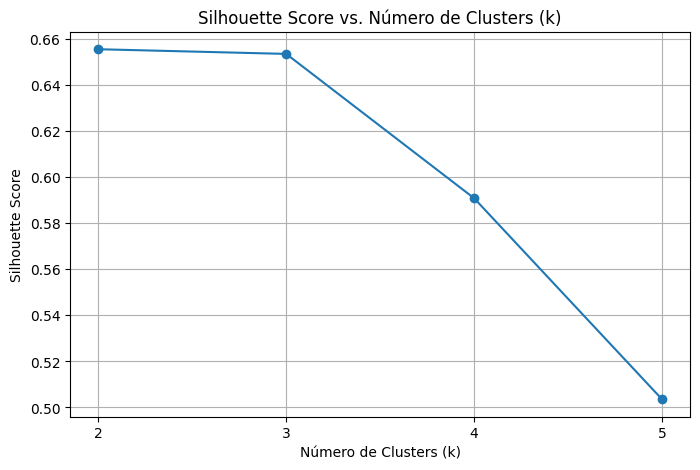

In [ ]:
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=15)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score para k = {k}: {score:.4f}")

# Gr√°fico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. N√∫mero de Clusters (k)")
plt.xlabel("N√∫mero de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_values)
plt.show()

### Evaluaci√≥n del Modelo 1 (Renta + Antig√ºedad)

Se utilizaron dos enfoques complementarios:

### 1. M√©todo del Codo (SSE)
El m√©todo del codo permite observar la disminuci√≥n de la **suma de los errores al cuadrado (SSE)** conforme se incrementa el n√∫mero de clusters. La inflexi√≥n en la curva indica un punto a partir del cual agregar m√°s clusters no mejora significativamente la compactaci√≥n del modelo.

- El codo se detect√≥ en **k = 3**
- Valor de SSE correspondiente: `25420.19`

### 2. Silhouette Score
El **silhouette score** eval√∫a qu√© tan bien separados y cohesionados est√°n los clusters formados. Este √≠ndice oscila entre -1 y 1, donde valores m√°s altos indican una mejor estructura de agrupamiento.

| k | Silhouette Score |
|---|------------------|
| 2 | **0.6557**       |
| 3 | 0.6536           |
| 4 | 0.5909           |
| 5 | 0.5036           |

Aunque el codo sugiere k = 3 como punto de inflexi√≥n, el mayor **silhouette score** se obtiene con **k = 2**, y dicho valor decae progresivamente a medida que se incrementa k.

---

### ‚úÖ Conclusi√≥n
Se elige **n_clusters = 2** para el Modelo 1, dado que:
- Maximiza la separaci√≥n relativa entre grupos seg√∫n el silhouette score.
- Permite una interpretaci√≥n m√°s clara de los clusters generados, manteniendo la simplicidad del modelo.
- La leve mejora en compacidad al usar k = 3 no compensa la p√©rdida de cohesi√≥n relativa.

Esta configuraci√≥n es coherente con el objetivo del modelo: obtener una segmentaci√≥n inicial basada en patrones simples pero significativos en el comportamiento de renta y antig√ºedad.


### Creaci√≥n y entrenamiento del modelo

In [ ]:
kmeans_modelo_1 = KMeans(n_clusters=2, n_init="auto", random_state=15).fit(X)
centroids = kmeans_modelo_1.cluster_centers_
print(centroids)

[[ 0.05948682  1.62419397]
 [-0.0160917  -0.43935862]]


### Distribuci√≥n de los Clusters

In [ ]:
labels_test = kmeans_modelo_1.fit_predict(X)
unique, counts = np.unique(labels_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} puntos")

Cluster 0: 10930 puntos
Cluster 1: 40194 puntos


### üß† Resultados del Modelo 1: Clustering con Renta y Antig√ºedad

Se implement√≥ el algoritmo **K-Means** para segmentar a los clientes en funci√≥n de sus caracter√≠sticas financieras, utilizando las variables **Renta** y **Antig√ºedad**, previamente escaladas. Estas dos dimensiones permiten aproximarse al perfil econ√≥mico y a la relaci√≥n hist√≥rica del cliente con la instituci√≥n.

---

### üîß Par√°metros del Modelo
- **Variables utilizadas:** `Renta` y `Antig√ºedad` (escaladas mediante `StandardScaler`)
- **N√∫mero de clusters (k):** 2
- **random_state:** 15

---

### üìä M√©tricas Clave
- **Silhouette Score:** `0.65` ‚Äî indica una **buena cohesi√≥n y separaci√≥n** entre los clusters formados.
- **Distribuci√≥n de clientes por cluster:**
  - Cluster 0: 10.930 clientes
  - Cluster 1: 40.194 clientes
- **Coordenadas de los centroides (en datos escalados):**

| Cluster | Renta (scaled) | Antig√ºedad (scaled) |
|---------|----------------|----------------------|
| 0       | 0.059          | 1.624                |
| 1       | -0.016         | -0.439               |

---

### üîç Interpretaci√≥n de los Grupos
- **Cluster 0:** Agrupa a clientes con **mayor antig√ºedad** y una renta **ligeramente superior al promedio**. Este segmento puede representar perfiles consolidados, con relaciones m√°s estables y posiblemente mayor valor estrat√©gico.
  
- **Cluster 1:** Re√∫ne a clientes con **menor antig√ºedad** y renta **ligeramente inferior a la media**, posiblemente representando perfiles m√°s recientes o en etapas tempranas de vinculaci√≥n con el banco.

---

### ‚úÖ Conclusi√≥n

El modelo logra una **segmentaci√≥n clara y coherente** desde la perspectiva de negocio, diferenciando dos perfiles de cliente bien definidos. El silhouette score de `0.65` valida la calidad del agrupamiento, sugiriendo que las observaciones est√°n bien asignadas a sus respectivos clusters sin indicios de sobreajuste.


## Modelo de segmentaci√≥n usando 4 o m√°s variables

### Selecci√≥n de las variables

In [ ]:
X_2 = np.array(scaled_df_3[["Renta_scaled", "Antiguedad_scaled", "CUPO_L1_scaled", "Txs_T12_scaled"]])

### Selecci√≥n de n√∫mero de clusters √≥ptimo

In [ ]:
sse_2 = []
for k in range(2, 21):
  kkmeans_2 = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X_2)
  sse_2.append(kkmeans_2.inertia_)

kl_2 = KneeLocator(range(2, 21), sse_2, curve="convex", direction="decreasing")
print("El codo est√° en k =", kl_2.elbow)
print("El SSE =", kl_2.all_elbows_y)

El codo est√° en k = 7
El SSE = [np.float64(55158.90335896957)]


Se aplic√≥ el m√©todo del codo (elbow method) para determinar el valor √≥ptimo de `k` (n√∫mero de clusters) evaluando el Error Cuadr√°tico Total (SSE). El resultado obtenido fue:

- üìå **Codo detectado en** `k = 7`
- üßÆ **SSE en ese punto**: 55.158,90

Silhouette score para k = 2: 0.4844
Silhouette score para k = 3: 0.4936
Silhouette score para k = 4: 0.4937
Silhouette score para k = 5: 0.4727
Silhouette score para k = 6: 0.3725


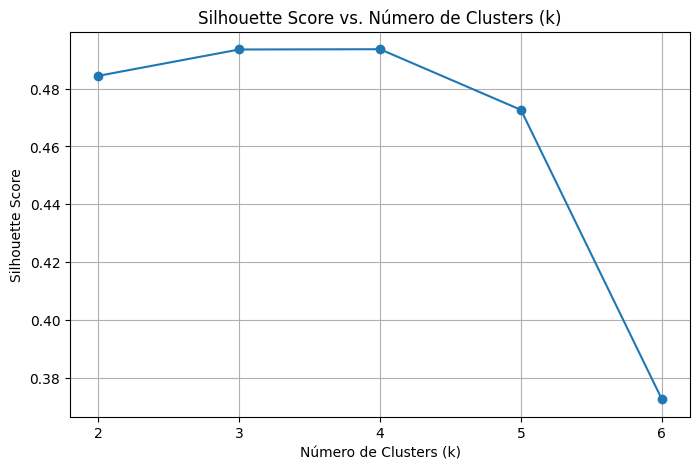

In [ ]:
silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    kmeans_test_k = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans_test_k.fit_predict(X_2)
    score = silhouette_score(X_2, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score para k = {k}: {score:.4f}")

# Gr√°fico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. N√∫mero de Clusters (k)")
plt.xlabel("N√∫mero de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_values)
plt.show()

### Evaluaci√≥n del Modelo 2 (Renta + Antiguedad + Txs_T12 + CUPO_L1)

En esta segunda iteraci√≥n del an√°lisis, se construy√≥ un modelo de clustering utilizando las siguientes cuatro variables escaladas: `Renta`, `Antig√ºedad`, `CUPO_L1` y `Txs_T12`.

---

### üìà M√©trica de calidad de clustering: Silhouette Score

Se evalu√≥ la cohesi√≥n y separaci√≥n de los clusters mediante la m√©trica **Silhouette Score**, que var√≠a entre -1 y 1 (mayor es mejor). Los resultados fueron:

| N√∫mero de Clusters (k) | Silhouette Score |
|------------------------|------------------|
| 2                      | 0.4844           |
| 3                      | 0.4936           |
| 4                      | 0.4937           |
| 5                      | 0.4727           |

---

### üß† Interpretaci√≥n de los hallazgos

Aunque el m√©todo del codo sugiere un valor √≥ptimo de `k = 7`, los **Silhouette Scores alcanzan su m√°ximo en `k = 4` (0.4937)** y se mantienen bastante similares en `k = 3` (0.4936), con valores ligeramente menores en `k = 2` y `k = 5`.

---

### ‚úÖ Conclusi√≥n

A pesar de que `k = 7` minimiza el SSE, los Silhouette Scores no respaldan claramente esta elecci√≥n. Por lo tanto, en pr√≥ximas secciones se analizar√°n los resultados de los clustering para diferentes valores de `k` a fin de escoger el m√°s representativo y √∫til para el negocio.

In [ ]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(X_2)
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\nResultados para k = {k}:")
    for u, c in zip(unique, counts):
        print(f"  Cluster {u}: {c} puntos")


Resultados para k = 2:
  Cluster 0: 38489 puntos
  Cluster 1: 12635 puntos

Resultados para k = 3:
  Cluster 0: 35998 puntos
  Cluster 1: 4367 puntos
  Cluster 2: 10759 puntos

Resultados para k = 4:
  Cluster 0: 35975 puntos
  Cluster 1: 4386 puntos
  Cluster 2: 10760 puntos
  Cluster 3: 3 puntos

Resultados para k = 5:
  Cluster 0: 34905 puntos
  Cluster 1: 4158 puntos
  Cluster 2: 4249 puntos
  Cluster 3: 3 puntos
  Cluster 4: 7809 puntos


### üîé An√°lisis de Distribuci√≥n de los cluster para diferentes valores `k`

A continuaci√≥n se presentan los resultados de la distribuci√≥n de clientes en cada cluster para distintos valores de `k`, utilizando las variables escaladas `Renta`, `Antig√ºedad`, `Txs_T12` y `CUPO_L1`.

---

### üìä Distribuci√≥n de clientes por cantidad de clusters

`k = 2`
- Cluster 0: 38,489 clientes  
- Cluster 1: 12,635 clientes  

`k = 3`
- Cluster 0: 35,998 clientes  
- Cluster 1: 4,367 clientes  
- Cluster 2: 10,759 clientes  

`k = 4`
- Cluster 0: 35,975 clientes  
- Cluster 1: 4,386 clientes  
- Cluster 2: 10,760 clientes  
- Cluster 3: 3 clientes  

`k = 5`
- Cluster 0: 34,905 clientes  
- Cluster 1: 4,158 clientes  
- Cluster 2: 4,249 clientes  
- Cluster 3: 3 clientes  
- Cluster 4: 7,809 clientes  

---

### üß† Interpretaci√≥n

- `k = 2` ofrece una segmentaci√≥n clara y balanceada, con una divisi√≥n que podr√≠a representar dos grandes perfiles de cliente, sin presencia de agrupaciones peque√±as o ruidosas.
  
- `k = 3` introduce un tercer grupo de tama√±o razonable (10.759 clientes), pero tambi√©n aparece un cluster peque√±o (4.367), lo que podr√≠a indicar la presencia de un subgrupo m√°s espec√≠fico o una posible transici√≥n entre dos grupos mayores.

- `k = 4 y k = 5` empiezan a mostrar **clusters con muy pocos clientes (3 en ambos casos)**. Estos grupos tan peque√±os no son estables ni confiables y podr√≠an representar **outliers** o casos extremos m√°s que segmentos reales del negocio.

- El crecimiento de `k` a 5 tambi√©n fragmenta los clusters grandes en varios medianos, pero **sin una ganancia clara de interpretaci√≥n**, y aumentando el riesgo de **sobresegmentaci√≥n**.

---

### ‚úÖ Conclusi√≥n

La estructura de los datos sugiere que **los valores de `k = 2` y `k = 3` son los m√°s razonables**, ya que mantienen una buena separaci√≥n entre grupos sin crear clusters irrelevantes o artificiales. La aparici√≥n de micro-clusters con pocos datos al aumentar `k` indica que los datos no sustentan m√°s de tres agrupaciones significativas en t√©rminos de negocio. Se decide utilizar `k = 3`, dado que posee un Silhoutte Scorre m√°s alto que `k = 2`

### Creaci√≥n y entrenamiento del modelo

In [ ]:
kmeans_modelo_2 = KMeans(n_clusters=3, n_init="auto", random_state=42).fit(X_2)
centroids_modelo_2 = kmeans_modelo_2.cluster_centers_
print(centroids_modelo_2)

[[-0.03204425 -0.44849284 -0.38632947 -0.28837422]
 [ 0.06424396  0.21676844  0.0785      2.52545364]
 [ 0.08118019  1.41208723  1.26011848 -0.05671722]]


### üß† Resultados del Modelo 2: Clustering con Renta, Antig√ºedad, Transacci√≥n en el Mes 12, y L√≠mite de Cr√©dito

En esta segunda iteraci√≥n del an√°lisis, se aplic√≥ el algoritmo **K-Means** utilizando un conjunto de **cuatro variables escaladas**: `Renta`, `Antig√ºedad`, `CUPO_L1` y `Txs_T12`. Estas variables buscan capturar una visi√≥n m√°s completa del perfil financiero y de comportamiento de los clientes.

---

### üîß Par√°metros del Modelo
- **Variables utilizadas:** `Renta`, `Antig√ºedad`, `CUPO_L1`, `Txs_T12` (todas escaladas con `StandardScaler`)
- **N√∫mero de clusters (k):** 3
- **random_state:** 15

---

### üìä M√©tricas Clave
- **Silhouette Score:** `0.4936` ‚Äî una **cohesi√≥n y separaci√≥n moderada**, indicando que la estructura de los clusters es √∫til aunque no perfectamente definida.
- **Distribuci√≥n de clientes por cluster:**
  - Cluster 0: 35.998 clientes
  - Cluster 1: 4.367 clientes
  - Cluster 2: 10.759 clientes

---

### üîç Interpretaci√≥n de los Grupos
- **Cluster 0:** Representa el grupo m√°s numeroso, lo que sugiere que muchos clientes comparten un perfil com√∫n en t√©rminos de renta, cupo y antig√ºedad.
  
- **Cluster 1:** Es considerablemente m√°s peque√±o, lo que podr√≠a indicar un **grupo especializado o un nicho** con caracter√≠sticas financieras particulares, por ejemplo: cupo alto pero transacciones bajas, o bien clientes con un comportamiento at√≠pico.

- **Cluster 2:** Representa un grupo intermedio, posiblemente con un **perfil financiero mixto**, que podr√≠a ser objeto de estrategias comerciales diferenciadas.

---

### ‚úÖ Conclusi√≥n

El Modelo 2 permite una **segmentaci√≥n m√°s rica y granular** que el Modelo 1, introduciendo dimensiones de comportamiento y riesgo financiero (como `Txs_T12` y `CUPO_L1`). Si bien el Silhouette Score no supera el 0.5 la segmentaci√≥n obtenida sigue siendo √∫til para an√°lisis exploratorios y para definir estrategias dirigidas a grupos espec√≠ficos.

### Aplicaci√≥n de PCA

-------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------
[0.40033175 0.24858714 0.23378943 0.11729169]


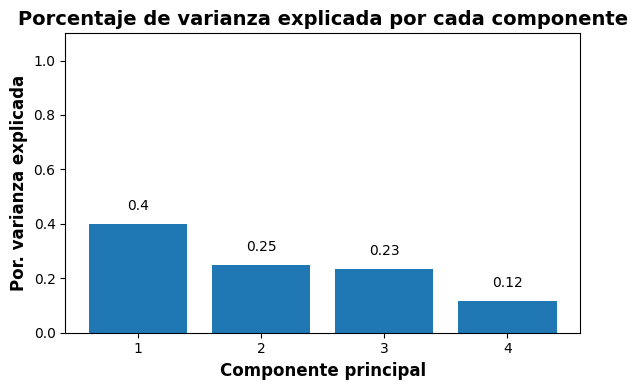

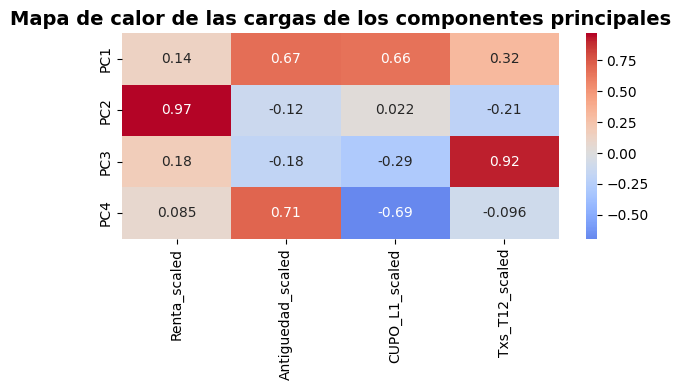

Cargas de los componentes principales:
     Renta_scaled  Antiguedad_scaled  CUPO_L1_scaled  Txs_T12_scaled
PC1          0.14               0.67            0.66            0.32
PC2          0.97              -0.12            0.02           -0.21
PC3          0.18              -0.18           -0.29            0.92
PC4          0.08               0.71           -0.69           -0.10


In [ ]:
pca = PCA()
pca.fit(X_2)

print('-'*55)
print('Porcentaje de varianza explicada por cada componente')
print('-'*55)
print(pca.explained_variance_ratio_)

# Gr√°fico de varianza explicada
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(
    x=np.arange(pca.n_components_) + 1,
    height=pca.explained_variance_ratio_
)

# Anotar cada barra con su valor
for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=14, fontweight="bold")
ax.set_xlabel('Componente principal', fontsize=12, fontweight="bold")
ax.set_ylabel('Por. varianza explicada', fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

# Mapa de calor de las cargas
loadings = pd.DataFrame(
    pca.components_,
    columns=scaled_df_3.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

plt.figure(figsize=(6, 4))
sb.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de las cargas de los componentes principales", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

pd.set_option('display.float_format', '{:.2f}'.format)  # Formato bonito
print("Cargas de los componentes principales:")
print(loadings)

In [ ]:
pca = PCA(n_components=1)
pca.fit(X_2)

PCA(n_components=1)

In [ ]:
pca_components = pd.DataFrame(
    data    = pca.components_,
    columns = scaled_df_3.columns,
    index   = ['PC1']
).T
pca_components

PC1
Renta_scaled      0.14
Antiguedad_scaled 0.67
CUPO_L1_scaled    0.66
Txs_T12_scaled    0.32

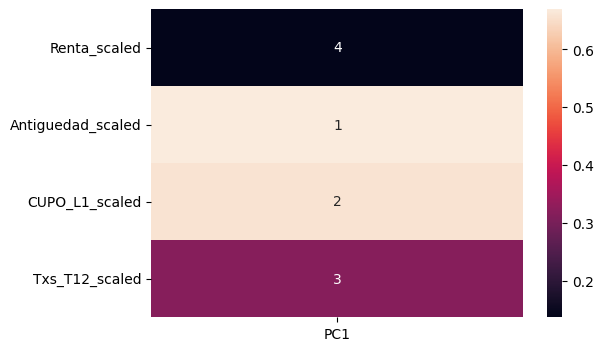

In [ ]:
plt.figure(figsize=(6,4))
sb.heatmap(pca_components,  annot=pca_components.rank(axis="rows", ascending = False));

### üìä An√°lisis de Componentes Principales (PCA) - Modelo 2

Se aplic√≥ **An√°lisis de Componentes Principales (PCA)** sobre las variables escaladas del Modelo 2: `Renta`, `Antig√ºedad`, `CUPO_L1` y `Txs_T12`. El objetivo fue **identificar la contribuci√≥n relativa de cada variable** en la estructura de los datos y entender c√≥mo se agrupan de manera no supervisada.

---

### üîé Varianza explicada por componente

| Componente | % Varianza Explicada |
|------------|-----------------------|
| PC1        | 40.03%                |
| PC2        | 24.86%                |
| PC3        | 23.38%                |
| PC4        | 11.73%                |

Los **dos primeros componentes explican aproximadamente el 65% de la varianza total** de los datos, y los **tres primeros explican m√°s del 88%**, lo cual es adecuado para an√°lisis de reducci√≥n de dimensionalidad o visualizaci√≥n en 2D/3D.

---

### üí° Cargas de los componentes principales

Las cargas (loadings) representan la influencia de cada variable original en cada componente principal:

#### PC1 (40.03% de varianza)
- Predominan `Antig√ºedad` (0.67) y `CUPO_L1` (0.66)
- Tambi√©n influye `Txs_T12` (0.32) de forma moderada
- `Renta` tiene poca influencia directa (0.14)

**Interpretaci√≥n:** Este componente parece capturar la relaci√≥n entre **trayectoria del cliente y cupo asignado**, posiblemente reflejando estabilidad y perfil crediticio.

#### PC2 (24.86% de varianza)
- Alta carga en `Renta` (0.97), que domina completamente este componente
- El resto de las variables apenas influyen

**Interpretaci√≥n:** Este componente representa **exclusivamente la dimensi√≥n de ingreso del cliente**.

#### PC3 (23.38% de varianza)
- Alta carga en `Txs_T12` (0.92), baja influencia de otras variables

**Interpretaci√≥n:** Captura el comportamiento **transaccional**, indicando frecuencia o actividad del cliente.

#### PC4 (11.73% de varianza)
- Cargas mixtas sin un patr√≥n dominante
- `Antig√ºedad` (0.71) y `CUPO_L1` (-0.69) tienen pesos opuestos

**Interpretaci√≥n:** Componente menos relevante, podr√≠a reflejar interacciones residuales entre antig√ºedad y cupo.

---

### ‚úÖ Conclusiones

- Los primeros **tres componentes principales resumen eficazmente la mayor√≠a de la varianza del dataset** (88.28%), lo cual valida su utilidad para visualizaci√≥n o reducci√≥n de dimensiones.
- `Renta`, `CUPO_L1`, `Antig√ºedad` y `Txs_T12` capturan **dimensiones distintas del comportamiento del cliente**, lo cual justifica su inclusi√≥n en el modelo.
- La estructura revelada por PCA respalda el uso de estos atributos para clustering, ya que aportan **informaci√≥n complementaria**.

Se recomienda usar al menos los primeros dos componentes si se busca visualizaci√≥n o an√°lisis simplificado, o mantener las cuatro variables si se prioriza la retenci√≥n de informaci√≥n.
